# Hydrodome Simulation Plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
from scipy.ndimage import gaussian_filter
import os

## theoretical angular distributions

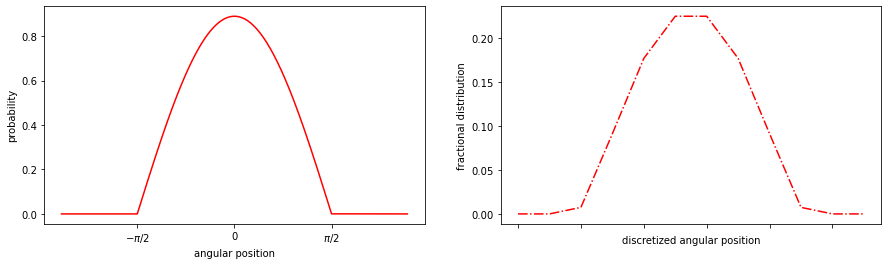

In [2]:
_N_per_edge = 1000
N_edges = 24
_N_Bins = 12

probsByLength = np.roll([0.04079888, 0.04079888, 0.04079888, 0.04079888, 0.04079888,0.04079888, 0.04079888, 0.04079888, 0.04079888, 0.04079888,
    0.04079888, 0.04079888, 0.04079888, 0.04079888, 0.04079888,
    0.04079888, 0.04079888, 0.04079888, 0.04079888, 0.04079888,
    0.04079888, 0.04079888, 0.04079888, 0.04079888, 0.,
    0., 0.02082684, 0. , 0.        ], 17)

theta = np.linspace(1.39*np.pi,-.39*np.pi,_N_per_edge*N_edges)

ballistic = np.zeros(len(theta))
i = 0
for angle in theta:
    if angle <= np.pi and angle >= 0:
        ballistic[i] = 1.78*np.sin(angle)/2
    i += 1
        
noSlip = np.sin(theta)**2*2./np.pi
noStress = (1+np.sin(theta)**2)/np.pi*2/3

ballisticDist = np.zeros(N_edges)
noSlipDist = np.zeros(N_edges)
noStressDist = np.zeros(N_edges)
ballisticDistBin = np.zeros(_N_Bins)
noSlipDistBin = np.zeros(_N_Bins)
noStressDistBin = np.zeros(_N_Bins)

for i in range(N_edges):
    ballisticDist[i] = (np.sum(ballistic[i*_N_per_edge:((i+1)*_N_per_edge)]) /
                        (_N_per_edge*N_edges)*np.pi)
    noSlipDist[i] = (np.sum(noSlip[i*_N_per_edge:((i+1)*_N_per_edge)]) /
                        (_N_per_edge*N_edges)*np.pi)
    noStressDist[i] = (np.sum(noStress[i*_N_per_edge:((i+1)*_N_per_edge)]) /
                        (_N_per_edge*N_edges)*np.pi)

for i in range(_N_Bins):
    ballisticDistBin[i] = (np.sum(ballistic[i*2*_N_per_edge:((i+1)*_N_per_edge*2)]) /
                        (_N_per_edge*2*_N_Bins)*np.pi)
    noSlipDistBin[i] = (np.sum(noSlip[i*2*_N_per_edge:((i+1)*_N_per_edge*2)]) /
                        (_N_per_edge*2*_N_Bins)*np.pi)
    noStressDistBin[i] = (np.sum(noStress[i*2*_N_per_edge:((i+1)*_N_per_edge*2)]) /
                        (_N_per_edge*2*_N_Bins)*np.pi)
    
fig = plt.figure(figsize=(15,4))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.plot(theta*180/np.pi-90,ballistic,'r')
#ax0.plot(theta*180/np.pi-90,noSlip,'g')
#ax0.plot(theta*180/np.pi-90,noStress,'b')
ax0.set_xticks([-90,0,90])
ax0.set_xticklabels([r'$-\pi/2$',0,r'$\pi/2$'])
ax0.set_xlabel('angular position')
ax0.set_ylabel('probability')

ax1.plot(ballisticDistBin,'r-.')
#ax1.plot(noSlipDist,'g-.')
#ax1.plot(noStressDist,'b-.')
ax1.set_xticklabels([])
ax1.set_xlabel('discretized angular position')
ax1.set_ylabel('fractional distribution')
plt.show()

## plot simulation results

fullCircle_T1_SD1_setBySim6milSteps


FileNotFoundError: [Errno 2] No such file or directory: './/fullCircle_T1_SD1_setBySim6milSteps/fullCircle_T1_SD1_setBySim6milSteps_000.npz'

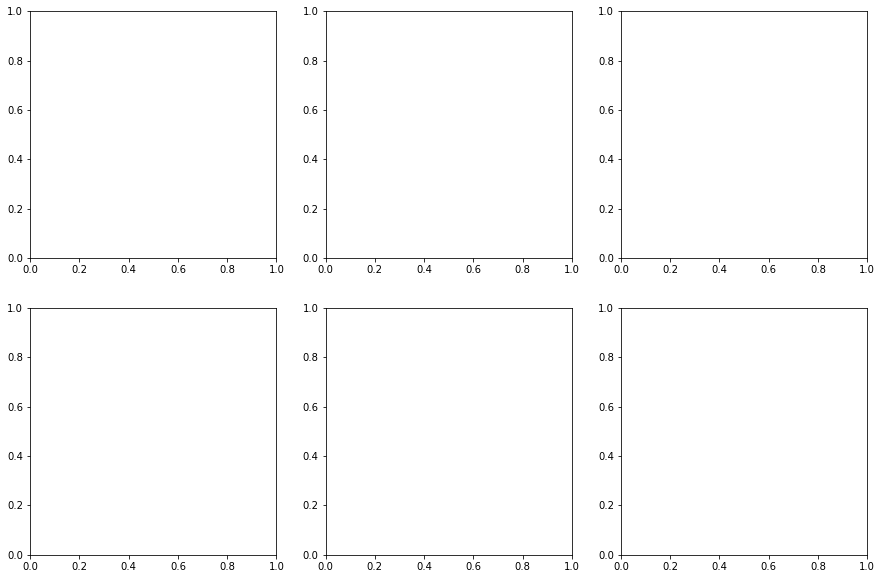

In [3]:
directory = ''
fnameBases = ['fullCircle_T1_SD1_setBySim6milSteps'] #list of base name of simulations

Nsims = 1 #number of simulations
blur = 0 #performs a gaussian blur

symm = False #symmetrizes the output

for fnameNum,fnameBase in enumerate(fnameBases):
    print(fnameBase)

    fig = plt.figure(figsize = (15,10))
    ax0 = fig.add_subplot(231)
    ax1 = fig.add_subplot(232)
    ax2 = fig.add_subplot(233) 
    ax3 = fig.add_subplot(234)
    ax4 = fig.add_subplot(235)
    ax5 = fig.add_subplot(236)

    #calculate the angle dependence and sum up the densities
    for i in range(Nsims):
        fname = fnameBase
        with np.load('./'+directory+'/'+fname+'/'+fname+'_%03d.npz'%i) as mat:
            if i == 0:
                Erho = mat['Erho'].copy()
                rho = mat['rho'].copy()
                vX = mat['Px'].copy()
                vY = mat['Py'].copy()
                nInjections= mat['Ninjected']
                angleDep = mat['Nabsorbed'][0:N_edges:1]-mat['Ninjected'][0:N_edges:1]
                angleDep2 = (mat['Nabsorbed'][0:N_edges:2]+mat['Nabsorbed'][1:N_edges:2])-(mat['Ninjected'][0:N_edges:2]+mat['Ninjected'][1:N_edges:2])
                
                print('total timesteps: %d'%mat['timeCount'])
                #load in the 2D histogram axes from simulation            
                histX = mat['histX']
                histY = mat['histY']
                borderX = mat['borderX']
                borderY = mat['borderY']
                edgeStyle = mat['edgeStyle']
                trueProbs= mat['Probs'].copy()
            else:
                Erho += mat['Erho']
                rho += mat['rho']
                vX  += mat['Px']
                vY  += mat['Py']
                nInjections += mat['Ninjected']
                angleDep += mat['Nabsorbed'][0:N_edges:1]-mat['Ninjected'][0:N_edges:1]
                angleDep2 += (mat['Nabsorbed'][1:N_edges:2]+mat['Nabsorbed'][0:N_edges:2])-(mat['Ninjected'][0:N_edges:2]+mat['Ninjected'][1:N_edges:2])
    # inserts NaN for fictisious edges, so that they are not plotted

    f = -2
    for edge_idx in np.arange(len(edgeStyle)):
        idx_dif = len(borderX)-len(edgeStyle)  # difference between '' which changes with additions of NaNs
        edge = edgeStyle[edge_idx]
        if edge == f:
            borderX = np.insert(borderX,edge_idx + idx_dif, np.NaN)
            borderY = np.insert(borderY,edge_idx + idx_dif, np.NaN)


    #ax0 plots the particle density
    rhoPlot = gaussian_filter(rho.T,blur)
    m1 = np.median(rho)
    if symm:
        rhoPlot+=rhoPlot[:,::-1]
        rhoPlot/=2.
    ax0.pcolormesh(histX,histY,rhoPlot,cmap = 'gray', vmin = 0.999*m1,vmax = 1.001*m1)
    ax0.axis('off')
    ax0.plot(borderX,borderY,'r')
    ax0.axis('equal')

    #ax1 plots the horizontal velocity distribution
    vXplot = gaussian_filter(vX.T,blur)
    m1 = np.max(np.abs(vXplot))
    if symm:
        vXplot-=vXplot[:,::-1]
        vXplot/=2.
    ax1.pcolormesh(histX,histY,vXplot,cmap='gray', vmin=-m1, vmax=m1)
    ax1.axis('off')
    ax1.plot(borderX,borderY,'k')
    ax1.axis('equal')

    #ax2 plots the vertical velocity distribution
    vYplot = gaussian_filter(vY.T,blur)
    m1 = np.max(np.abs(vXplot))
    if symm:
        vYplot+=vYplot[:,::-1]
        vYplot/=2.
    ax2.pcolormesh(histX,histY,vYplot,cmap='gray', vmin=-m1, vmax=m1)
    ax2.axis('off')
    ax2.plot(borderX,borderY,'k')
    ax2.axis('equal')

    #ax3 plots the angular distribution
    if symm:
        angleDep+=angleDep[::-1]
        angleDep/=2.
    print('net particle flow: %d'%sum(angleDep))
        #x3.plot(noSlipDist*sum(angleDep),'g')
        #ax3.plot(noSlipDist*sum(angleDep),'g.')
        #ax3.plot(noStressDist*sum(angleDep),'b')
        #ax3.plot(noStressDist*sum(angleDep),'b.')
        #ax3.set_ylim(np.array(plt.ylim())*np.array((0,1)));
    ax3.plot(angleDep,'k.',markerSize = 20)
    ax3.plot(ballisticDist*sum(angleDep),'r')
    ax3.plot(ballisticDist*sum(angleDep),'r.')
    ax3.set_xlabel('discretized angular position')
    ax3.set_ylabel('total count')
    ax3.set_xticklabels([])

    ax4.plot(angleDep2,'k.',markerSize = 20)
    ax4.plot(ballisticDistBin*sum(angleDep),'r')
    ax4.plot(ballisticDistBin*sum(angleDep),'r.')
    ax4.set_xlabel('discretized angular position')
    ax4.set_xticklabels([])

    ax0.set_title('particle density')
    ax1.set_title('horizontal velocity')
    ax2.set_title('vertical velocity')
    ax3.set_title('angular distribution') 
    ax4.set_title('angular distribution (adjacents binned)')
    ax5.set_title('inject Probs difference w/ length (SD=1)',fontsize=11)

    totalReinjections = np.sum(nInjections)
    probs = nInjections[0:29]/totalReinjections
    probs = np.roll(probs,17)
    ax5.plot(probs-probsByLength)
    symmetrizedProbs= (probs[::-1]+probs)/2

    probs = np.roll(symmetrizedProbs,-17)
    nTipEdges = len(nInjections)-29
    probs = np.append(probs, np.zeros(nTipEdges))
    probs = [round(prob, 8) for prob in probs ]

    if directory == 'generateProbs':
        print("")
        print('injection probabilities', probs)


    plt.show()
    
    trueProbs = np.roll(trueProbs,17)
    trueProbs = [round(prob, 8) for prob in trueProbs ]
    print(trueProbs)

.DS_Store
fullCircle_exampleInput
filename Base: fullCircle_exampleInput
total timesteps: 0
net particle flow: 0


/var/folders/2q/zwhp08x13v922d11l_dgr4t80000gn/T/ipykernel_41902/3130591651.py:110: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax3.plot(angleDep,'k.',markerSize = 20, label='simulation data')
/var/folders/2q/zwhp08x13v922d11l_dgr4t80000gn/T/ipykernel_41902/3130591651.py:118: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax4.plot(angleDep2,'k.',markerSize = 20)
/var/folders/2q/zwhp08x13v922d11l_dgr4t80000gn/T/ipykernel_41902/3130591651.py:132: RuntimeWarning: invalid value encountered in true_divide
  probs = nInjections[0:29]/totalReinjections


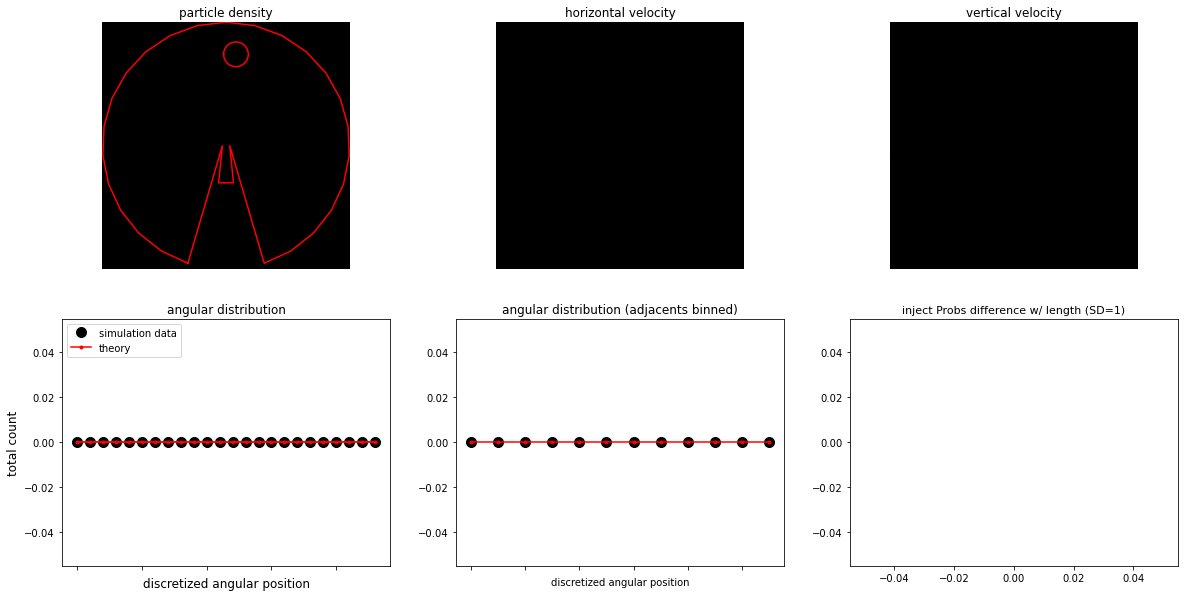

In [11]:
# To show an entire directories simulation results

directory = 'local_sims' # directory containing simulation data
fnameBases = os.listdir(directory) #list of base name of simulations
blur = 0 #performs a gaussian blur

symm = False #symmetrizes the output

N_bins = 24

for fnameNum,fnameBase in enumerate(fnameBases):
    print(fnameBase)
    if os.path.isdir('./'+directory+'/'+fnameBase):
        files=os.listdir(directory+'/'+fnameBase)
        NPZfiles=[file for file in files if "npz" in file]
        Nsims=len(NPZfiles)
        
        print('filename Base: '+fnameBase)

        fig = plt.figure(figsize = (20,10))
        ax0 = fig.add_subplot(231)
        ax1 = fig.add_subplot(232)
        ax2 = fig.add_subplot(233) 
        ax3 = fig.add_subplot(234)
        ax4 = fig.add_subplot(235)
        ax5 = fig.add_subplot(236)

        #calculate the angle dependence and sum up the densities
        for i in range(Nsims):
            fname = fnameBase
            with np.load('./'+directory+'/'+fname+'/'+fname+'_%03d.npz'%i) as mat:
                if i == 0:
                    Erho = mat['Erho'].copy()
                    rho = mat['Erho'].copy()
                    vX = mat['Px'].copy()
                    vY = mat['Py'].copy()
                    nInjections= mat['Ninjected']
                    angleDep = mat['Nabsorbed'][0:N_edges:1]-mat['Ninjected'][0:N_edges:1]
                    angleDep2 = (mat['Nabsorbed'][0:N_edges:2]+mat['Nabsorbed'][1:N_edges:2])-(mat['Ninjected'][0:N_edges:2]+mat['Ninjected'][1:N_edges:2])

                    print('total timesteps: %d'%mat['timeCount'])
                    #load in the 2D histogram axes from simulation            
                    histX = mat['histX']
                    histY = mat['histY']
                    borderX = mat['borderX']
                    _borderX = borderX
                    borderY = mat['borderY']
                    _borderY = borderY
                    edgeStyle = mat['edgeStyle']
                else:
                    Erho += mat['Erho']
                    rho += mat['rho']
                    vX  += mat['Px']
                    vY  += mat['Py']
                    nInjections += mat['Ninjected']
                    angleDep += mat['Nabsorbed'][0:24:1]-mat['Ninjected'][0:24:1]
                    angleDep2 += (mat['Nabsorbed'][0:24:2]+mat['Nabsorbed'][1:24:2])-(mat['Ninjected'][0:24:2]+mat['Ninjected'][1:24:2])
         # inserts NaN for fictisious edges, so that they are not plotted
        for edge_idx in np.arange(len(edgeStyle)):
            idx_dif = len(borderX)-len(edgeStyle)  # difference between '' which changes with additions of NaNs
            edge = edgeStyle[edge_idx]
            if edge == -2:
                borderX = np.insert(borderX,edge_idx + idx_dif, np.NaN)
                borderY = np.insert(borderY,edge_idx + idx_dif, np.NaN)


        #ax0 plots the particle density
        rhoPlot = gaussian_filter(rho.T,blur)
        m1 = np.median(rho)
        if symm:
            rhoPlot+=rhoPlot[:,::-1]
            rhoPlot/=2.
        ax0.pcolormesh(histX,histY,rhoPlot,cmap = 'gray', vmin = 0.99*m1,vmax = 1.01*m1)
        ax0.axis('off')
        ax0.plot(borderX,borderY,'r')
        ax0.axis('equal')

        #ax1 plots the horizontal velocity distribution
        vXplot = gaussian_filter(vX.T,blur)
        m1 = np.max(np.abs(vXplot))
        if symm:
            vXplot-=vXplot[:,::-1]
            vXplot/=2.
        ax1.pcolormesh(histX,histY,vXplot,cmap='gray', vmin=-m1, vmax=m1)
        ax1.axis('off')
        ax1.plot(borderX,borderY,'k')
        ax1.axis('equal')

        #ax2 plots the vertical velocity distribution
        vYplot = gaussian_filter(vY.T,blur)
        m1 = np.max(np.abs(vXplot))
        if symm:
            vYplot+=vYplot[:,::-1]
            vYplot/=2.
        ax2.pcolormesh(histX,histY,vYplot,cmap='gray', vmin=-m1, vmax=m1)
        ax2.axis('off')
        ax2.plot(borderX,borderY,'k')
        ax2.axis('equal')

        #ax3 plots the angular distribution
        if symm:
            angleDep+=angleDep[::-1]
            angleDep/=2.
        print('net particle flow: %d'%sum(angleDep))
        #x3.plot(noSlipDist*sum(angleDep),'g')
        #ax3.plot(noSlipDist*sum(angleDep),'g.')
        #ax3.plot(noStressDist*sum(angleDep),'b')
        #ax3.plot(noStressDist*sum(angleDep),'b.')
        #ax3.set_ylim(np.array(plt.ylim())*np.array((0,1)));
        ax3.plot(angleDep,'k.',markerSize = 20, label='simulation data')
        ax3.plot(ballisticDist*sum(angleDep),'r')
        ax3.plot(ballisticDist*sum(angleDep),'r.', linestyle='-', label='theory')
        ax3.set_xlabel('discretized angular position', size=12)
        ax3.set_ylabel('total count', size=12)
        ax3.legend(loc='upper left')
        ax3.set_xticklabels([])

        ax4.plot(angleDep2,'k.',markerSize = 20)
        ax4.plot(ballisticDistBin*sum(angleDep),'r')
        ax4.plot(ballisticDistBin*sum(angleDep),'r.')
        ax4.set_xlabel('discretized angular position')
        ax4.set_xticklabels([])

        ax0.set_title('particle density')
        ax1.set_title('horizontal velocity')
        ax2.set_title('vertical velocity')
        ax3.set_title('angular distribution') 
        ax4.set_title('angular distribution (adjacents binned)')
        ax5.set_title('inject Probs difference w/ length (SD=1)',fontsize=11)

        totalReinjections = np.sum(nInjections)
        probs = nInjections[0:29]/totalReinjections
        probs = np.roll(probs,17)
        ax5.plot(probs-probsByLength)
        symmetrizedProbs= (probs[::-1]+probs)/2

        probs = np.roll(symmetrizedProbs,-17)
        nTipEdges = len(nInjections)-29
        probs = np.append(probs, np.zeros(nTipEdges))
        probs = [round(prob, 8) for prob in probs ]

        if directory == 'generateProbs':
            print("")
            print('injection probabilities', probs)


        plt.show()


contains 0.1,3.7? [False]


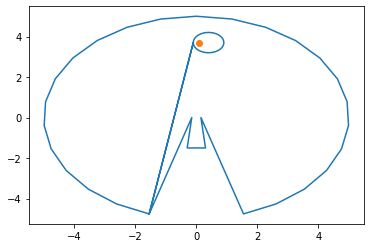

In [20]:
x,y = .1,3.7

borderPath=mpltPath.Path(np.vstack((_borderX,_borderY)).T)
print(f'contains {x},{y}?', borderPath.contains_points(np.vstack((x,y)).T))
      
plt.plot(_borderX,_borderY)
plt.plot(x,y,'.', markersize=12)

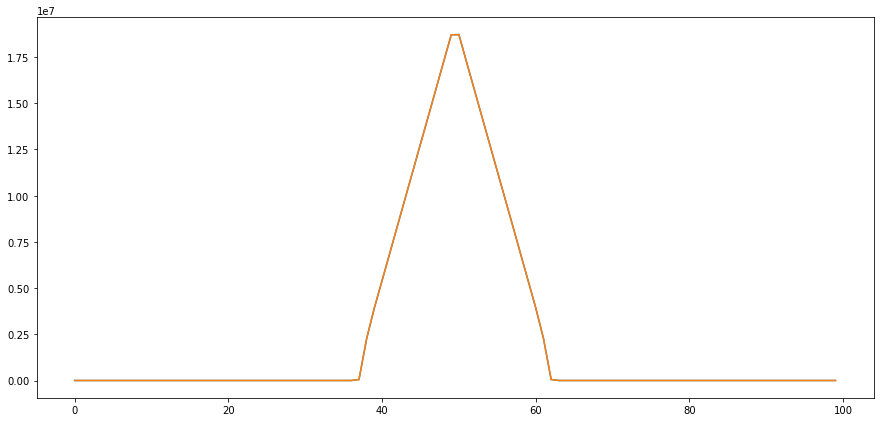

In [12]:
fig, ax = plt.subplots(figsize=[15,7])
ax.plot(rho[:,64])
ax.plot(Erho[:,64])

In [48]:
directory = 'data' # directory containing simulation data
fnameBase = 'fullCircle_exampleInput'

files=os.listdir(directory+'/'+fnameBase)
CSVfiles=[file for file in files if "csv" in file]

NinjectedMat = np
for i,CSVfile in enumerate(CSVfiles):
    with open(directory+'/'+fnameBase+'/'+CSVfile) as CSVfile:
        if i ==0:
            NinjectedMat = np.loadtxt(CSVfile, delimiter=",")
        else:
            NinjectedMat += np.loadtxt(CSVfile, delimiter=",")

print(array)
    



FileNotFoundError: [Errno 2] No such file or directory: 'data/fullCircle_exampleInput'

In [53]:
probsT100 = np.array([0.04069308, 0.04080785, 0.04081382, 0.04080102, 0.04080279, 0.04078091, 0.04078012, 0.04076464, 0.04075736, 0.04074116, 0.04075793, 0.04074778, 0.04074778, 0.04075793, 0.04074116, 0.04075736, 0.04076464, 0.04078012, 0.04078091, 0.04080279, 0.04080102, 0.04081382, 0.04080785, 0.04069308, 0.0, 0.0, 0.02150308, 0.0, 0.0])
probsT8 = np.array([0.04069656, 0.04079458, 0.04081065, 0.04081483, 0.04080958, 0.04079468, 0.0407601, 0.04075359, 0.04074212, 0.04075771, 0.04076103, 0.04077386, 0.04077386, 0.04076103, 0.04075771, 0.04074212, 0.04075359, 0.0407601, 0.04079468, 0.04080958, 0.04081483, 0.04081065, 0.04079458, 0.04069656, 0.0, 0.0, 0.02146141, 0.0, 0.0])

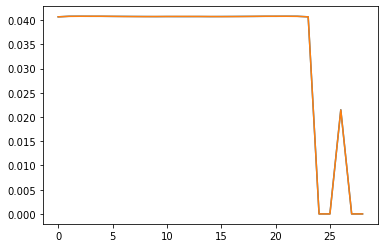

In [55]:
plt.plot(probsT100)
plt.plot(probsT8)